In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
airbnb = pd.read_csv('AB_NYC_2019.csv')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
airbnb.shape

(48895, 16)

In [5]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Checking for missing data

In [8]:
# top 30 features that have missing values
for i, v in airbnb.isnull().sum().items():
    print(i, " : ", round((v/30338)*100, 1))

id  :  0.0
name  :  0.1
host_id  :  0.0
host_name  :  0.1
neighbourhood_group  :  0.0
neighbourhood  :  0.0
latitude  :  0.0
longitude  :  0.0
room_type  :  0.0
price  :  0.0
minimum_nights  :  0.0
number_of_reviews  :  0.0
last_review  :  33.1
reviews_per_month  :  33.1
calculated_host_listings_count  :  0.0
availability_365  :  0.0


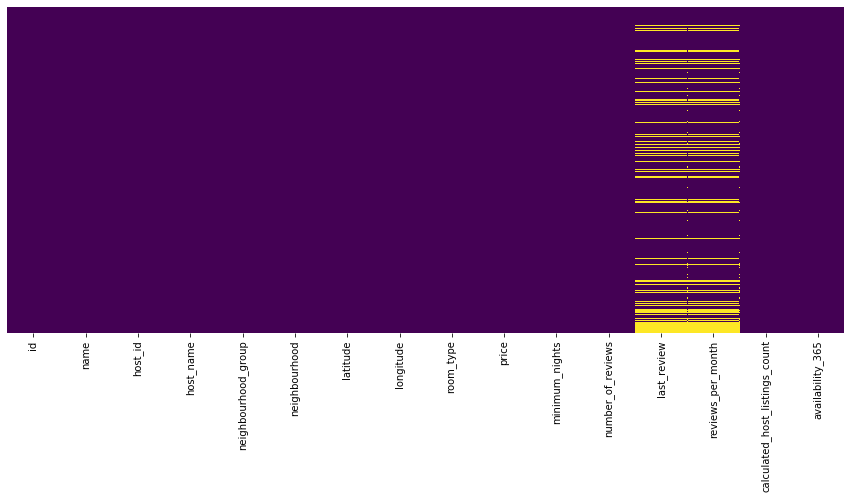

In [9]:
f = plt.figure(figsize=(15,6))
sns.heatmap(airbnb.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.show()
# plt.savefig('saving-a-seaborn-plot-as-pdf-file-300dpi.png', dpi=500)

In [10]:
# f.savefig("missing_data.pdf")
f.savefig('svm_conf.png', dpi=300, bbox_inches='tight')

In [11]:
print('Data columns with null values:',airbnb.isnull().sum(), sep = '\n')

Data columns with null values:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


## Handling missing values

In [12]:
airbnb['reviews_per_month'].fillna(value=0, inplace=True)
airbnb.drop(['id', 'name', 'host_name', 'last_review'], axis=1, inplace=True)

In [13]:
airbnb.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


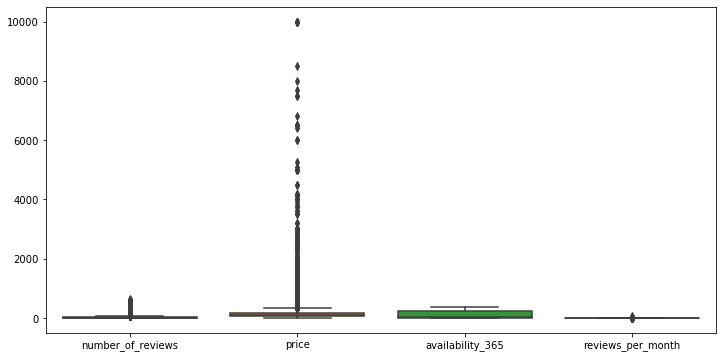

In [14]:

# airbnb[['number_of_reviews', 'price', 'availability_365', 'reviews_per_month']].plot.box(figsize=(12,6))
plt.figure(figsize=(12,6))
sns.boxplot(data=airbnb[['number_of_reviews', 'price', 'availability_365', 'reviews_per_month']])
# plt.savefig('outliar.png', dpi=300, bbox_inches='tight')


oof! except availability_365 all other numerical factors have huge amount of outliers,as from my experience it's better to remove these outliers because it will significantly disrupt our statistical analysis.

#### Removing outliers
Let's remove those outliers using IQR method

Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant.

In [15]:
Q1 = airbnb['price'].quantile(0.25)
Q3 = airbnb['price'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (airbnb['price'] >= Q1 - 1.5 * IQR) & (airbnb['price'] <= Q3 + 1.5 *IQR)
airbnb1=airbnb.loc[filter]

Q1 = airbnb1['number_of_reviews'].quantile(0.25)
Q3 = airbnb1['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (airbnb1['number_of_reviews'] >= Q1 - 1.5 * IQR) & (airbnb1['number_of_reviews'] <= Q3 + 1.5 *IQR)
airbnb2=airbnb1.loc[filter]


Q1 = airbnb2['reviews_per_month'].quantile(0.25)
Q3 = airbnb2['reviews_per_month'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (airbnb2['reviews_per_month'] >= Q1 - 1.5 * IQR) & (airbnb2['reviews_per_month'] <= Q3 + 1.5 *IQR)
airbnb_new=airbnb2.loc[filter]

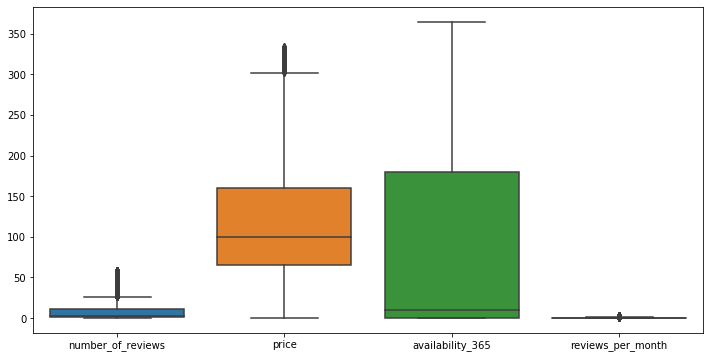

In [16]:
# airbnb_new[['number_of_reviews', 'price', 'availability_365', 'reviews_per_month']].plot.box(figsize=(12,6))
plt.figure(figsize=(12,6))
sns.boxplot(data=airbnb_new[['number_of_reviews', 'price', 'availability_365', 'reviews_per_month']])
plt.savefig('after_removing_outliar.png', dpi=300, bbox_inches='tight')

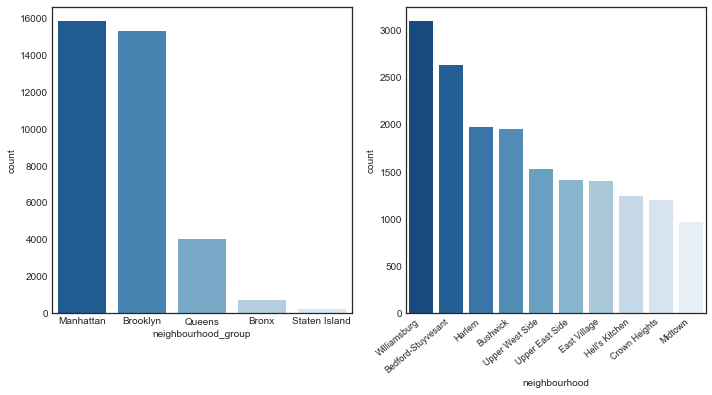

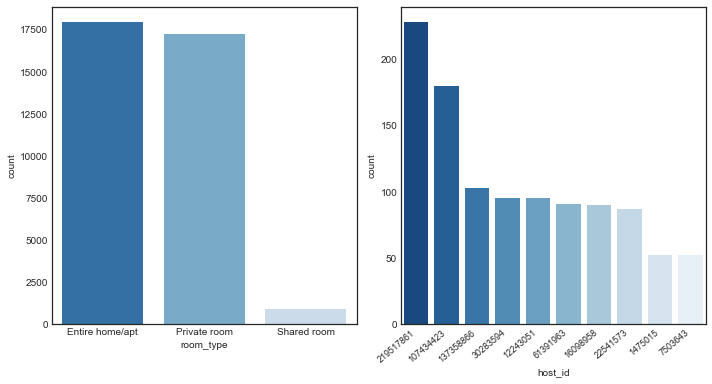

In [17]:
f = plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')


#Neighbourhood group
plt.subplot(221)
sns.countplot(x="neighbourhood_group", data=airbnb_new, palette="Blues_r",
              order=airbnb_new.neighbourhood_group.value_counts().index)
fig = plt.gcf()
fig.set_size_inches(10,10)

#Top 10 Neighbourhood
plt.subplot(222)
ax=sns.countplot(x="neighbourhood", data=airbnb_new, palette="Blues_r",
              order=airbnb_new.neighbourhood.value_counts().iloc[:10].index)
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.tight_layout()
plt.show()

#Room type
plt.subplot(223)
sns.countplot(x="room_type", data=airbnb_new, palette="Blues_r",
              order=airbnb_new.room_type.value_counts().index)
fig = plt.gcf()
fig.set_size_inches(10,10)

#Top 10 hosts
plt.subplot(224)
ax=sns.countplot(x="host_id", data=airbnb_new, palette="Blues_r",
              order=airbnb_new.host_id.value_counts().iloc[:10].index)
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.tight_layout()
plt.show()

# f.savefig('count plot2.png', dpi=300, bbox_inches='tight')

- In neighbourhood group(location),Manhattan and Brooklyn stands in the top 2 positions respectively owing to the size and number of people who booked a room and it is followed by Queens, Bronx and Staten Island
- The top 10 of neighbourhood(area) is displayed second and Williamsburg stands top with most no. of books of nearly 3000
- Most of the Entire home were booked than private and shared room type
- host id 219517861 has the most number of books and he/she is the best customer of Airbnb in the NY

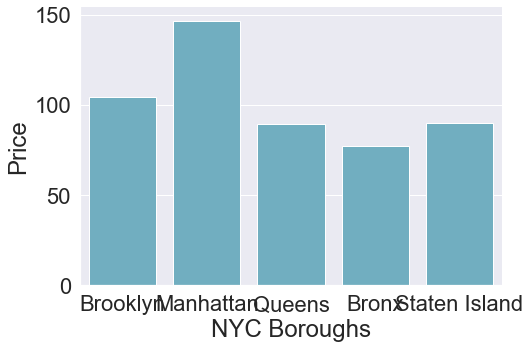

In [62]:
# plot_order = airbnb.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False).index.values
# f = plt.figure()
f = sns.catplot(x="neighbourhood_group", y="price", kind="bar", data=airbnb_new, 
            aspect=1.5, color="c", ci=None);
plt.xlabel('NYC Boroughs')
plt.ylabel('Price')

f.savefig('NYC Boroughs avg price.png', dpi=300, bbox_inches='tight')


#### Numerical factors-Distribution plot

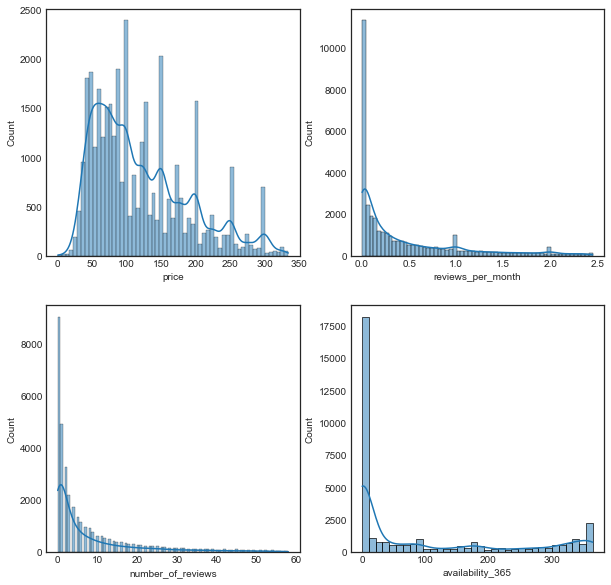

In [19]:
# plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(221)
sns.histplot(airbnb_new['price'], kde=True)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.subplot(222)
sns.histplot(airbnb_new['reviews_per_month'], label="100% Equities", kde=True)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.subplot(223)
sns.histplot(airbnb_new['number_of_reviews'], label="100% Equities", kde=True)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.subplot(224)
sns.histplot(airbnb_new['availability_365'], label="100% Equities", kde=True)
fig = plt.gcf()
fig.set_size_inches(10,10)

Inference

- All the numerical factors are having right skewed distribution
- Price factor has an unstable distribution
- Both the review factors distribution are similar as they are dependent

We need to preprocess these data before sending into the model

####  Distribution of prices across location- Box Plot

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

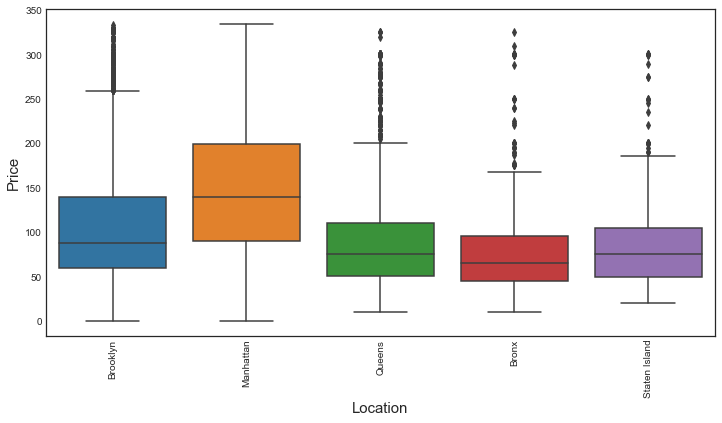

In [20]:
# plt.style.use('ggplot')
# plt.rcParams['figure.figsize'] = (12, 6)
f = plt.figure(figsize=(12,6))
sns.boxplot(x = 'neighbourhood_group', y ='price', data = airbnb_new)
plt.xlabel(xlabel = 'Location', fontsize = 15)
plt.ylabel(ylabel = 'Price', fontsize = 15)
# ax.set_title(label = 'Distribution of prices across location', fontsize = 30)
plt.xticks(rotation = 90)
# plt.show()

# plt.savefig('prices across location.png', dpi=300, bbox_inches='tight')

Inference

- The average prices of Brooklyn,Queens and Statent Island is more are less the same which varies around 75-100 dollars
- The prices are really high in Manhattan as the average price comes around 150 dollars and maximum reaches near 350 dollars
- The prices in Bronx are comparatively low as it average price is around 60 dollars.

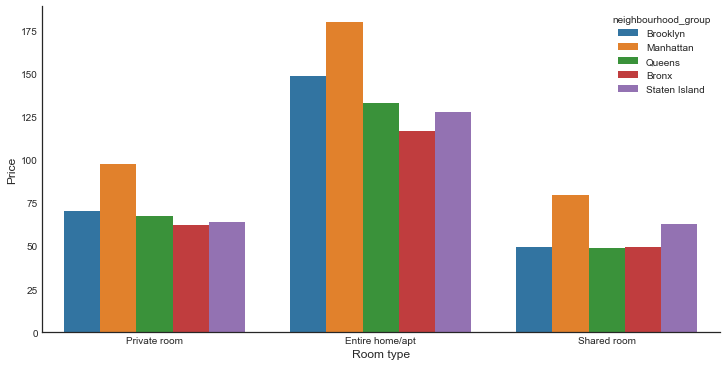

In [21]:
sns.catplot(x="room_type", y="price", hue='neighbourhood_group', kind="bar", data=airbnb_new, aspect=2, ci=False, legend_out=False)
plt.xlabel(xlabel = 'Room type', fontsize = 12)
plt.ylabel(ylabel = 'Price', fontsize = 12)

plt.savefig('prices with room_type.png', dpi=300, bbox_inches='tight')

Text(0, 0.5, '')

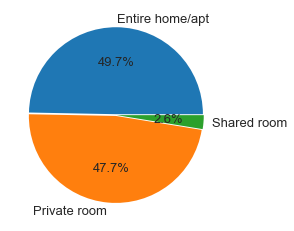

In [22]:
plt.style.use('seaborn-white')
# plt.subplots(figsize=(18,8))
colors = ['#72b4eb','#cea9bc', '#8464a0',]
airbnb_new['room_type'].value_counts().plot.pie(explode=[0.01,0.01,0.01],autopct='%1.1f%%',  fontsize = 13)
# plt.title('Room Type ')
plt.ylabel('')

# plt.savefig('piechart with room type.png', dpi=300, bbox_inches='tight')

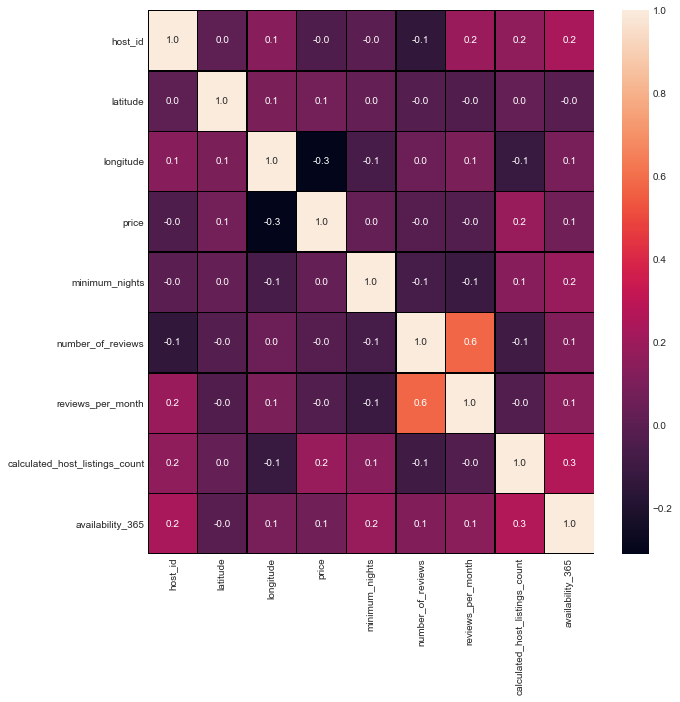

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(airbnb_new.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f")
sns.set(font_scale=2)
        
plt.savefig('heatmap corr.png', dpi=300, bbox_inches='tight')

Inference:

- Number of reviews and reviews per month have strong positive correlation and it is very obvious
- Availability_365 and minimum nights have a small positive correlation(0.2) which shows that whenever the list was displayed people stayed there, which is also obvious
- Price and Calculated list hosting have a small positive correlation(0.2) which shows that price has been increased when more number of lists have been shown to the host

In [25]:
airbnb_new

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
6,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


## Features selection

In [26]:
airbnb_features=airbnb_new[['neighbourhood_group','room_type','availability_365','minimum_nights','calculated_host_listings_count','reviews_per_month']]
airbnb_features.head()

,neighbourhood_group,room_type,availability_365,minimum_nights,calculated_host_listings_count,reviews_per_month
0,Brooklyn,Private room,365,1,6,0.21
1,Manhattan,Entire home/apt,355,1,2,0.38
2,Manhattan,Private room,365,3,1,0.00
4,Manhattan,Entire home/apt,0,10,1,0.10
6,Brooklyn,Private room,0,45,1,0.40


In [27]:
boroughs = pd.get_dummies(airbnb_features['neighbourhood_group'])
room_type = pd.get_dummies(airbnb_features['room_type'])
airbnb_features = pd.concat([airbnb_features,boroughs, room_type], axis=1)
airbnb_features.drop(['neighbourhood_group','room_type'],axis=1, inplace=True)


In [28]:
airbnb_features

,availability_365,minimum_nights,calculated_host_listings_count,reviews_per_month,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
0,365,1,6,0.21,0,1,0,0,0,0,1,0
1,355,1,2,0.38,0,0,1,0,0,1,0,0
2,365,3,1,0.00,0,0,1,0,0,0,1,0
4,0,10,1,0.10,0,0,1,0,0,1,0,0
6,0,45,1,0.40,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,9,2,2,0.00,0,1,0,0,0,0,1,0
48891,36,4,2,0.00,0,1,0,0,0,0,1,0
48892,27,10,1,0.00,0,0,1,0,0,1,0,0
48893,2,1,6,0.00,0,0,1,0,0,0,0,1


## Linear Regression

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


from sklearn import preprocessing, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [49]:
X = airbnb_features
y = airbnb_new['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [55]:
### Fitting Linear regression
reg1 = LinearRegression().fit(x_train, y_train)

### R squared value
reg1.score(x_train, y_train)

0.4573861441034339

In [56]:
### Coefficients
reg1.coef_

array([ 5.19379033e-02, -2.06978648e-01,  1.34023417e-01, -2.33622505e+00,
       -1.63257416e+01,  3.21472684e+00,  3.10432232e+01, -6.15661532e+00,
       -1.17755931e+01,  5.96282794e+01, -1.87780821e+01, -4.08501973e+01])

In [34]:
### Predicting 
y_pred = reg1.predict(x_test)

In [35]:
Coeff1 = pd.DataFrame(columns=["Variable","Coefficient"])
Coeff1["Variable"]=x_train.columns
Coeff1["Coefficient"]=reg1.coef_
Coeff1.sort_values("Coefficient")

,Variable,Coefficient
11,Shared room,-40.850197
10,Private room,-18.778082
4,Bronx,-16.325742
8,Staten Island,-11.775593
7,Queens,-6.156615
3,reviews_per_month,-2.336225
1,minimum_nights,-0.206979
0,availability_365,0.051938
2,calculated_host_listings_count,0.134023
5,Brooklyn,3.214727


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MAE :', mean_absolute_error(y_test, y_pred))
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE : 37.371551275652735
MSE : 2535.8022508539025
RMSE : 50.35674980431027


In [37]:
 ## Compute R-squred and Adj R-squred
SS_Residual = sum((y_test-y_pred)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X.shape[1]-1)

print("R^2 on testing set: ",r_squared)
print("Adj R^2 on testing set: ",adjusted_r_squared, "\n")

print('R^2 score on training set', reg1.score(x_train, y_train))

R^2 on testing set:  0.46272944339320843
Adj R^2 on testing set:  0.46183560633799126 

R^2 score on training set 0.4573861441034339


### Random Forest Regression

In [61]:
# Random Forest with cross validation and grid search
param_grid = [{'n_estimators':[100, 200, 400, 500, 600, 800, 1000], 
               'max_features':['auto', 'sqrt']}]

m = RandomForestRegressor(n_estimators=100, min_samples_leaf=5, n_jobs=-1)
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
grid_search = GridSearchCV(m, param_grid, cv=kfold)
grid_search.fit(x_train, y_train)

print("Train Accuracy :",grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

predictions = grid_search.predict(x_test)

### Test accuracy
grid_search.score(x_test, y_test)

Train Accuracy : 0.49451004671045373
{'max_features': 'sqrt', 'n_estimators': 600}
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


0.5057622032055438

In [59]:
print('MAE :', mean_absolute_error(y_test, predictions))
print('MSE :', mean_squared_error(y_test, predictions))
print('RMSE :', np.sqrt(mean_squared_error(y_test, predictions)))

MAE : 35.304722717687554
MSE : 2332.910033483227
RMSE : 48.3002073855095


In [60]:
 ## Compute R-squred and Adj R-squred
SS_Residual = sum((y_test-predictions)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X.shape[1]-1)

print("R^2 on testing set: ",r_squared)
print("Adj R^2 on testing set: ",adjusted_r_squared, "\n")

print('R^2 score on training set', grid_search.score(x_train, y_train))

R^2 on testing set:  0.505717028297047
Adj R^2 on testing set:  0.5048947080890288 

R^2 score on training set 0.603027658198571


In [ ]:

temp_X = airbnb_features
y = airbnb['price']

#SelectKBest class to extract top K best features
top_features = SelectKBest(score_func=f_regression)
fit = top_features.fit(temp_X, y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(temp_X.columns)

#Concat two dataframes for better visualization 
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature','Score']
print(feature_scores.nlargest(15,'Score')) 

print(list(feature_scores.nlargest(15,'Score')['Feature']))

In [44]:
from sklearn import preprocessing
X=preprocessing.scale(airbnb_features)
y=airbnb.price
print(X)
print(y)

[[ 2.05772879 -0.32012801 -0.04432648 ... -0.99381927  1.04623811
  -0.16236422]
 [ 1.98104135 -0.32012801 -0.16550653 ...  1.00621917 -0.95580537
  -0.16236422]
 [ 2.05772879 -0.22909945 -0.19580154 ... -0.99381927  1.04623811
  -0.16236422]
 ...
 [-0.53430689  0.0895005  -0.19580154 ...  1.00621917 -0.95580537
  -0.16236422]
 [-0.7260255  -0.32012801 -0.04432648 ... -0.99381927 -0.95580537
   6.15899258]
 [-0.56498187 -0.04704234 -0.19580154 ... -0.99381927  1.04623811
  -0.16236422]]
0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64
